# ขั้นที่ 1: Merge table
เริ่มด้วยการพิจารณาข้อมูลแบบคร่าวๆ และนำข้อมูลที่ถูกจัดเก็บในหลาย table มารวม merge กันให้กลายเป็น table เดียว

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# โหลดข้อมูล
---

In [57]:
applicant = pd.read_csv("data/jobthai/applicant_df.csv")
application = pd.read_csv("data/jobthai/application_df.csv")
company = pd.read_csv("data/jobthai/company_df.csv")
position = pd.read_csv("data/jobthai/position_df.csv")

print('---------- Shape of dataframe ----------')
print('applicant (ผู้สมัคร):', applicant.shape)
print('application (ใบสมัคร):', application.shape)
print('position (ตำแหน่ง):', position.shape)
print('company (บริษัท):', company.shape)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,6,22,26,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


---------- Shape of dataframe ----------
applicant (ผู้สมัคร): (1142772, 67)
application (ใบสมัคร): (1108101, 5)
position (ตำแหน่ง): (59826, 22)
company (บริษัท): (13245, 4)


# ระยะเวลาที่ของข้อมูลใน Position และ Applicant
---

In [58]:
print('------------------------------------------------')
print('ตรวจสอบช่วงเวลาที่เก็บข้อมูลของ position และ application')
print('------------------------------------------------')
print('position:')
print('ตัวอย่างล่าสุด', position['Date'].max())
print('ตัวอย่างที่เก่าที่สุด', position['Date'].min())
print('\n')
print('application:')
print('ตัวอย่างล่าสุด', application['AppliedDate'].max())
print('ตัวอย่างที่เก่าที่สุด', application['AppliedDate'].min())

------------------------------------------------
ตรวจสอบช่วงเวลาที่เก็บข้อมูลของ position และ application
------------------------------------------------
position:
ตัวอย่างล่าสุด 2018-03-27 10:49:40
ตัวอย่างที่เก่าที่สุด 2017-12-27 00:00:00


application:
ตัวอย่างล่าสุด 2018-02-05 14:00:00
ตัวอย่างที่เก่าที่สุด 2018-01-01 00:01:14


### สรุป
ตำแหน่งงานบนฐานข้อมูลมีตั้งแต่ 12/2017 - 03/2018 ส่วนใบสมัครมีแค่เดือนเดียว คือ 01/2018 - 02/2018
ในใบสมัครมีบาง "PositionID" ที่ไม่เหมือนกับ "PositionID" ของตำแหน่ง สาเหตุอาจมาจากผู้สมัครทำการสมัครงานเก่าที่อยู่นอกเหนือฐานข้อมูลของตำแหน่งที่เก็บมาในระยะ 4 เดือนข้างต้น

# Merge all information
---

In [9]:
#Change column name
applicant = applicant.rename(columns = {'Salary': 'appSalary', 
                                    'MinSalary': 'appMinSalary',
                                    'MaxSalary': 'appMaxSalary',
                                    'JobCate_1': 'appJobCate_1',
                                    'JobCate_2': 'appJobCate_2',
                                    'Province': 'appProvince',
                                    'Amphoe': 'appAmphoe',
                                    'Tambon': 'appTambon'})

position = position.rename(columns = {'Salary': 'posSalary', 
                                    'MinSalary': 'posMinSalary', 
                                    'MaxSalary': 'posMaxSalary',
                                    'JobCate': 'posJobCate',
                                    'SubJobCate': 'posSubJobCate'})
                                    
company = company.rename(columns = {'Province': 'comProvince',
                                    'Amphoe': 'comAmphoe',
                                    'Tambon': 'comTambon'})    

In [10]:
alldata = pd.merge(application, position, how='inner', on='PositionID')
alldata = pd.merge(alldata, applicant, how='inner', on='ApplicantID')

In [11]:
alldata = alldata.rename(columns = {'CompanyID_x': 'CompanyID'})
alldata = pd.merge(alldata, company, how='inner', on='CompanyID')

# Select data
---

In [52]:
df  =        alldata[['ApplicantID','ApplicationID', 'PositionID', 'CompanyID',
                    #Target
                    'AppliedDate',
                    #From applicant
                    'Gender','BirthDate','WantedPosition_1', 'appJobCate_1','WantedPosition_2', 
                    'appJobCate_2', 'Skill_1', 'Skill_2', 'Skill_3','Skill_4', 'Skill_5', 'WorkPlace',
                    'appMinSalary','appMaxSalary',
                    'EduField',
                    'GradLevel_1','GradSchool_1','GradField_1','GradDegree_1','GradCategory_1','GradFaculty_1',
                    'GradLevel_2','GradSchool_2','GradField_2','GradDegree_2','GradCategory_2','GradFaculty_2',
                    'GradLevel_3','GradSchool_3','GradField_3','GradDegree_3','GradCategory_3','GradFaculty_3',
                    'PrevPosition_1','PrevCategory_1','PrevLevel_1','PrevDuty_1','PrevSalary_1',
                    'PrevPosition_2','PrevCategory_2','PrevLevel_2','PrevDuty_2','PrevSalary_2',
                    'PrevPosition_3','PrevCategory_3','PrevLevel_3','PrevDuty_3','PrevSalary_3',
                    'appProvince','appAmphoe','appTambon',
                    'StartWorkYear','WorkExperience',
                    'PrevSalary_1_ext','PrevSalary_2_ext','PrevSalary_3_ext',
                    #From position
                    'Title','Description','posJobCate','posSubJobCate',
                    'Skill1','Skill2','Skill3','Skill4','Skill5',
                    'Skill6','Skill7','Skill8','Skill9','Skill10',
                    'posSalary','posMinSalary','posMaxSalary','PositionNumber',
                    'Date','Online', 
                    'comProvince','comAmphoe','comTambon'
                    ]]

print('-----------------------------------------')
print('กลุ่มตัวอย่างที่เราสนใจคือใบสมัครจำนวน: ', df.shape[0], 'ใบ')
print('-----------------------------------------')

-----------------------------------------
กลุ่มตัวอย่างที่เราสนใจคือใบสมัครจำนวน:  1042077 ใบ
-----------------------------------------


In [55]:
#df[df['ApplicantID'] == 'มีใจรักในเทคโนโลยีและ Apple']

In [54]:
#Save เป็น file .csv
df.to_csv('df_noOutliers.csv', encoding='utf-8')

## ตัดตัวอย่างที่เป็น outliers ออก

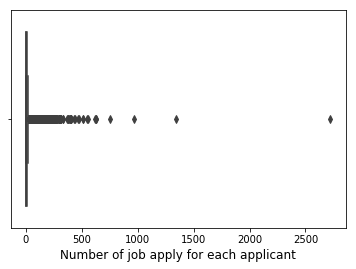

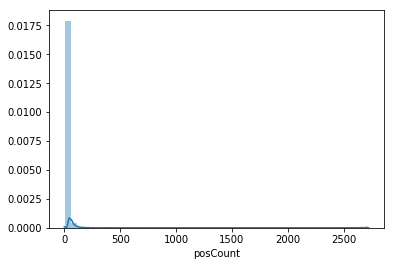

สรุปจำนวนกลุ่มตัวอย่างที่เราสนใจ
-----------------------
ตัดผู้สมัครที่มีจำนวนครั้งการสมัครเยอะผิดปกติออก จะได้ผลดังนี้


จำนวนผู้สมัคร
จากผู้มัคร:  101276 คน
ตัดผู้สมัคร:  10696 คน
เหลือจำนวนผู้สมัคร:  90580 คน


จำนวนใบสมัคร
จากใบสมัคร:  1042077 ใบ
ตัดใบสมัคร:  531261 ใบ
เหลือจำนวนใบสมัคร:  510816 ใบ


In [45]:
#คนที่สมัครเยอะมากๆ ผู้สมัครพวกนี้เป็น outliers เราอาจจะต้องตัดทิ้ง ลองดู boxplot ก่อน
x = df.groupby('ApplicantID', as_index=False)['PositionID'].count()
x = x.rename(columns = {'PositionID': 'posCount'})
x = x.sort_values(by=['posCount'], ascending=False)

#plt.figure(figsize=[14,10])
ax = sns.boxplot(x=x['posCount'])
ax.set_xlabel('Number of job apply for each applicant',fontsize=12)
plt.show()

#plot histogram
ax = sns.distplot(x['posCount'])
plt.show()

#ผู้สมัครบางคนสมัครงานหลายครั้งมากๆ เป็น outliers ต้องตัดทิ้ง
#Q3 + 1.5*IQ
IQ = x.describe().loc['75%'] - x.describe().loc['25%']
normal_range = x.describe().loc['75%'] + 1.5*IQ
normal_range = round(normal_range[0])

#ดึงเฉพาะแถวที่เป็นตัวอย่างปกติ
appID = x[x['posCount'] < normal_range]['ApplicantID']
noOutliers = df[df['ApplicantID'].isin(appID)]
applicationNorSize = noOutliers.shape[0]
noOutliers = noOutliers.groupby('ApplicantID')['PositionID'].count()
appNorSize = noOutliers.shape[0]

outlierID = x[x['posCount'] >= normal_range]['ApplicantID']
outliers = df[df['ApplicantID'].isin(outlierID)]
applicationOutSize = outliers.shape[0]
outliers = outliers.groupby('ApplicantID')['PositionID'].count()
appOutSize = outliers.shape[0]

print('สรุปจำนวนกลุ่มตัวอย่างที่เราสนใจ')
print('-----------------------')
print('ตัดผู้สมัครที่มีจำนวนครั้งการสมัครเยอะผิดปกติออก จะได้ผลดังนี้')
print('\n')
print('จำนวนผู้สมัคร')
print('จากผู้มัคร: ', appNorSize+appOutSize, 'คน')
print('ตัดผู้สมัคร: ', appOutSize, 'คน')
print('เหลือจำนวนผู้สมัคร: ', appNorSize, 'คน')
print('\n')
print('จำนวนใบสมัคร')
print('จากใบสมัคร: ', applicationNorSize+applicationOutSize, 'ใบ')
print('ตัดใบสมัคร: ', applicationOutSize, 'ใบ')
print('เหลือจำนวนใบสมัคร: ', applicationNorSize, 'ใบ')

#สร้าง dataframe ใหม่เฉพาะตัวอย่างที่มีจำนวนการสมัครงานปกติ
df = df[df['ApplicantID'].isin(noOutliers.index) == True]

# Save to csv
---

In [ ]:
#Save เป็น file .csv
df.head(100).to_csv('df_noOutliers.csv', encoding='utf-8')